In [6]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from statsmodels.nonparametric.kernel_regression import KernelReg
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Lodaing the path to the folder
DATA_PATH = "/content/drive/MyDrive/studia/Inżynierka/MAIN/"

In [67]:
# Loading the prepared dataset
data = pd.read_csv(DATA_PATH + 'PreparedDataset.csv', low_memory=False)
data['Datetime'] = pd.to_datetime(data['Datetime'], utc=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3483 entries, 0 to 3482
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   Datetime  3483 non-null   datetime64[ns, UTC]
 1   Close     3483 non-null   float64            
 2   Returns   3483 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(2)
memory usage: 81.8 KB
None


In [38]:
data.head()

,Datetime,Close,Returns
0,2022-10-31 14:30:00+00:00,153.300003,0.54
1,2022-10-31 15:30:00+00:00,153.979996,0.44
2,2022-10-31 16:30:00+00:00,153.949997,-0.02
3,2022-10-31 17:30:00+00:00,153.770004,-0.12
4,2022-10-31 18:30:00+00:00,153.339996,-0.28


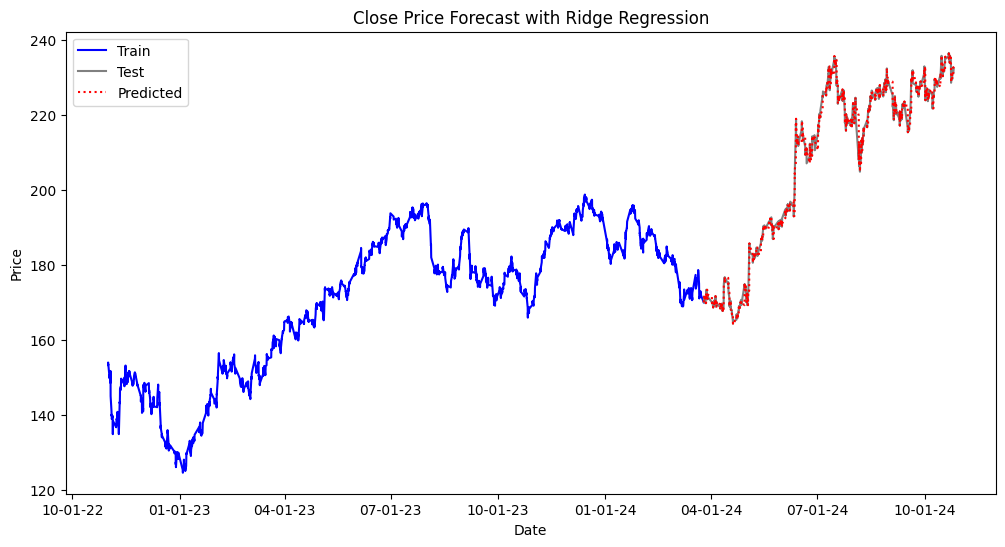

Mean Squared Error: 1.78
Root Mean Squared Error: 1.33
Mean Absolute Percentage Error: 0.37
Mean Absolute Error: 0.77


In [84]:
# Ridge Regression
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

data_length = len(data)
train_size = int(data_length *0.7)
train = data['Returns'][0:train_size]
test = data['Returns'][train_size:]
test_length = len(test)
train_price = data['Close'][0:train_size]
test_price = data['Close'][train_size:]

# Parameter Reguralization Lambda (aplha lambda)
alpha = 5.0

history = [i for i in train]
predicted_returns = []

model = Ridge(alpha=alpha)

# Rolling forecast
for a in range(test_length):
  x_train = np.arange(len(history)).reshape(-1,1)
  y_train = np.array(history)

  # Fit ridge model
  model.fit(x_train, y_train)

  # Make predictions
  x_prediction = np.array([[len(history)]])
  y_prediction = model.predict(x_prediction)
  predicted_returns.append(y_prediction[0])

  # Update history
  history.append(test.iloc[a])

# Convertion of predicted returns into prices
predicted_prices = []
for i,predicted_return in enumerate(predicted_returns):
  new_price = test_price.iloc[i-1] if i>0  else train_price.iloc[-1]

  predicted_prices.append(new_price*(1 + predicted_return/100))

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(data.Datetime[:train_size], train_price, color="blue", label = "Train")
plt.plot(data.Datetime[train_size:], test_price, color="grey", label = "Test")
plt.plot(data.Datetime[train_size:], predicted_prices, label = "Predicted", color='red', linestyle=':')
ax=plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%y'))
plt.legend(loc='upper left')
plt.title("Close Price Forecast with Ridge Regression")
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Calculate error metrics
mse = round(mean_squared_error(test_price, predicted_prices), 2)
rmse = round(np.sqrt(mse), 2)
mape = round(np.mean(np.abs((test_price - predicted_prices) / test_price)) * 100, 2)
mae = round(np.mean(np.abs(test_price - predicted_prices)), 2)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Mean Absolute Error:', mae)

